<a href="https://colab.research.google.com/github/09481845456/Netflix-Userbase-Analysis/blob/main/3B_BERCADES_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Userbase Analysis**

# Part 1: Data Preprocessing

## Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load the Dataset

In [ ]:
df = pd.read_csv('Netflix_Userbase.csv')
print(df.head(100))

    User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0         1             Basic               10  15-01-22          10-06-23   
1         2           Premium               15  05-09-21          22-06-23   
2         3          Standard               12  28-02-23          27-06-23   
3         4          Standard               12  10-07-22          26-06-23   
4         5             Basic               10  01-05-23          28-06-23   
..      ...               ...              ...       ...               ...   
95       96           Premium               14  26-07-22          24-06-23   
96       97             Basic               10  05-03-22          24-06-23   
97       98          Standard               13  07-03-22          28-06-23   
98       99          Standard               12  13-01-23          24-06-23   
99      100             Basic               12  22-01-23          25-06-23   

           Country  Age  Gender      Device Plan Duration  
0  

# Handle Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values)
# Replace missing values in numerical columns with the mean of column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Missing Values:
 User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


## Encode Categorical Variables

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Subscription Type', 'Country', 'Gender', 'Device'])

print(df_encoded)

      User ID  Monthly Revenue  Age Plan Duration  Join Year  Join Month  \
0           1               10   28       1 Month       2022           1   
1           2               15   35       1 Month       2021           5   
2           3               12   42       1 Month       2023           2   
3           4               12   51       1 Month       2022          10   
4           5               10   33       1 Month       2023           1   
...       ...              ...  ...           ...        ...         ...   
2495     2496               14   28       1 Month       2022           7   
2496     2497               15   33       1 Month       2022           4   
2497     2498               12   38       1 Month       2022           9   
2498     2499               13   48       1 Month       2022          12   
2499     2500               15   35       1 Month       2022           8   

      Join Day  Last Payment Year  Last Payment Month  Last Payment Day  ...  \
0      

Feature Selection: Decide which features to include in the regression models. Explain your choice. I chose Linear Regression because it is need in part 3 also Linear regression is used for predicting outcomes based on input variables. It helps understand relationships between variables, analyze trends, and assess risks.

# Part 2: Exploratory Data Analysis (EDA

## Descriptive Statistics

In [ ]:
numeric_summary = df.describe()
print(numeric_summary)

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


## Visualizations

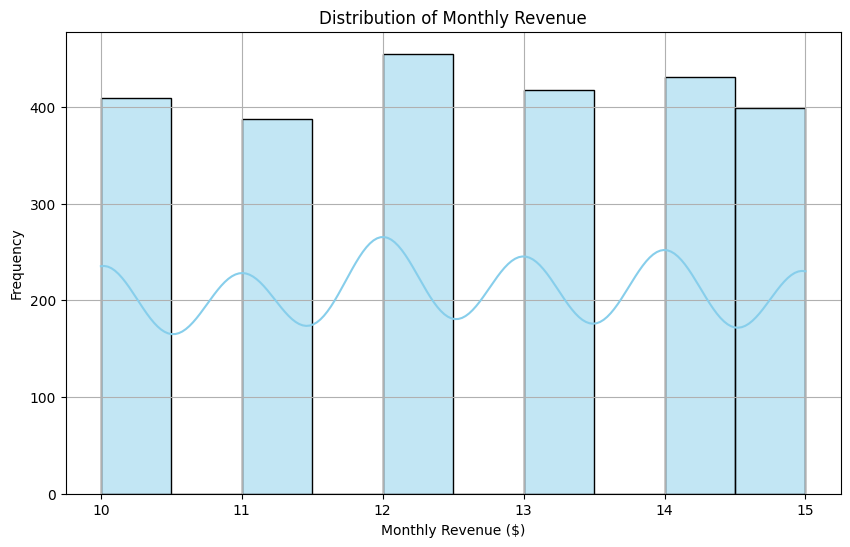

 The mean monthly revenue is approximately $12.51, with a standard deviation of approximately $1.69.
The minimum monthly revenue observed is $10, and the maximum monthly revenue is $15. The data is also summarized into quartiles, 
with 25% of the users generating monthly revenue of $11 or less, 50% generating $12 or less, and 75% generating $14 or less.


In [ ]:
# Histogram for Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Revenue', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
report = """ The mean monthly revenue is approximately $12.51, with a standard deviation of approximately $1.69.
The minimum monthly revenue observed is $10, and the maximum monthly revenue is $15. The data is also summarized into quartiles,
with 25% of the users generating monthly revenue of $11 or less, 50% generating $12 or less, and 75% generating $14 or less."""
print(report)

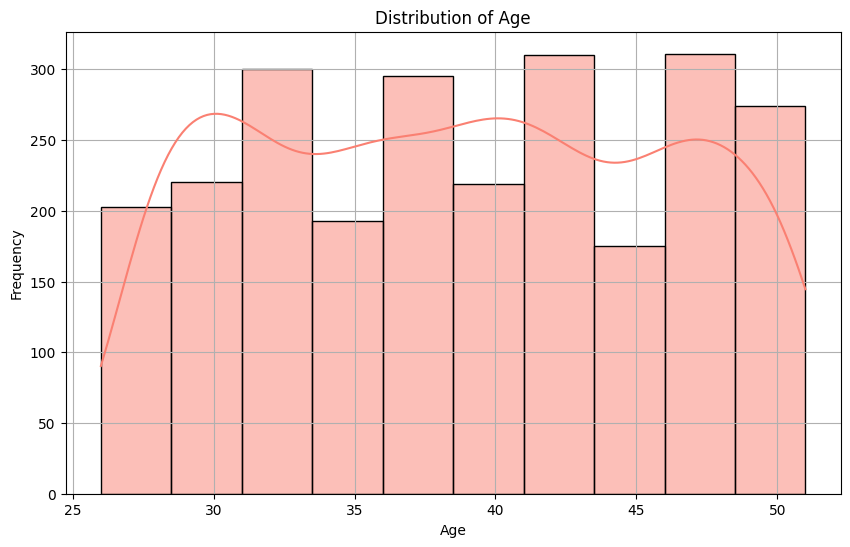

  The mean age is approximately 38.80 years, with a standard deviation of approximately 7.17 years.
 The youngest user is 26 years old, and the oldest user is 51 years old. Similar to the monthly revenue, 
 the age data is also summarized into quartiles.


In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
report = """  The mean age is approximately 38.80 years, with a standard deviation of approximately 7.17 years.
 The youngest user is 26 years old, and the oldest user is 51 years old. Similar to the monthly revenue,
 the age data is also summarized into quartiles."""
print(report)

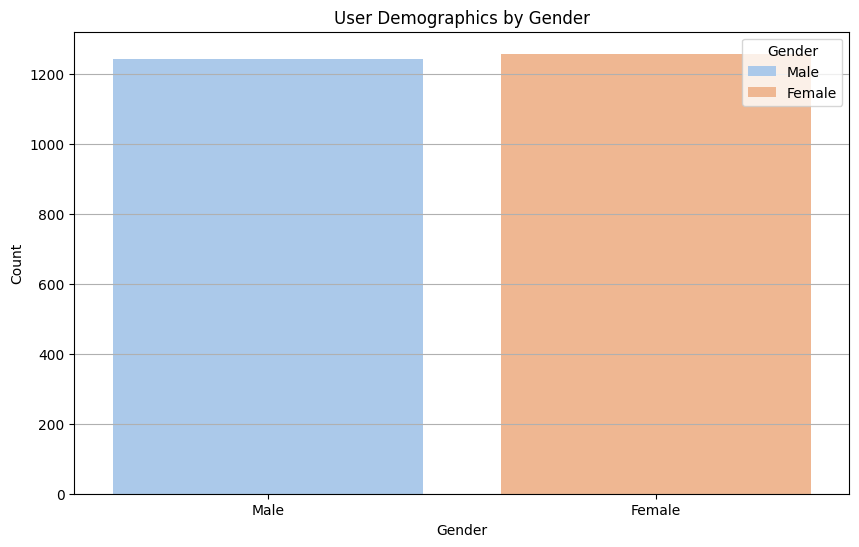

In [ ]:
# Bar plot for Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender',hue='Gender',legend='full', palette='pastel')
plt.title('User Demographics by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

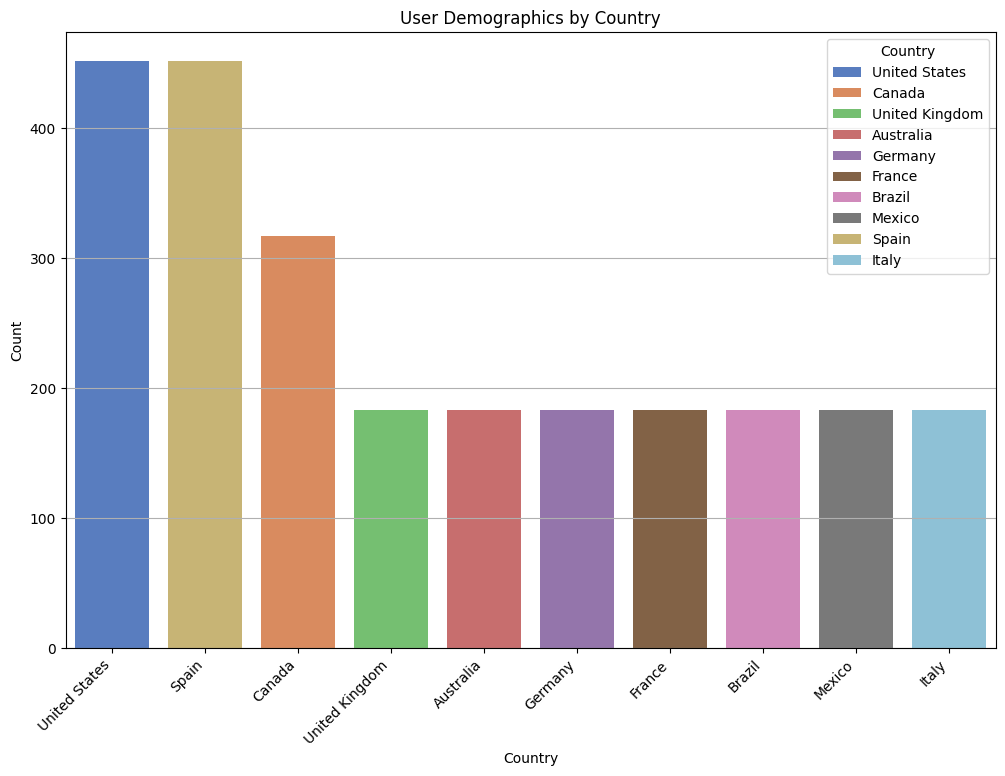

In [ ]:
# Bar plot for Country
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country', palette='muted',hue='Country',legend='full', order=df['Country'].value_counts().index)
plt.title('User Demographics by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Part 3: Linear Regression Model (Predicting Monthly Revenue)

## Build the Model

In [ ]:
X = df_encoded[['Subscription Type_Basic','Subscription Type_Premium', 'Subscription Type_Standard', 'Age','Gender_Female','Gender_Male','Device_Laptop',  'Device_Smart TV', 'Device_Smartphone'  ,'Device_Tablet'  ]]
y = df_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: -0.015913317831238505
RMSE: 1.6751450881423562


with an R-squared value close to zero and a relatively high RMSE, it appears that the linear regression model developed may not be a good fit for the data. This could be due to various reasons such as inappropriate model choice, insufficient features, or non-linear relationships between the features and the target variable. Further analysis and potentially different modeling techniques may be needed to improve the predictive performance of the model.